# Практическая работа  №3: Статистический анализ социальных сетей.
Выполнил студент гр. 0382 Азаров Максим. Вариант №24

## Цель работы
Овладеть навыками работы с математическими пакетами для статистического анализа социальных сетей.

## Основные теоретические положения
## Основные теоретические положения

1. **Диада** $-$ элемент сети, представляющий собой пару акторов и (возможную) связь между ними: 
$D_{ij}=(X_{ij}, X_{ji}), i\neq j$.

2. **Цензус диад** $-$ тройка чисел $M, A, N$, где:

$M = \sum_{i<j} X_{ij} X_{ji}$

$A = X_{++} - 2M$

$N = C^2_g - A - M$

3. **Индекс взаимности Каца-Пауэлла** (Reciprocity of Katz and Powell) $-$ характеристика измерения тенденции акторов в группе. Данный индекс оценивает тенденцию акторов в группе к взаимному выбору друг друга. 

$-\infty < \rho_{кр} \leqslant 1$.

Если $\rho_{кр} = 0$, то акторы не имеют склонности взаимно выбирать друг друга.

Если $\rho_{кр} = 1$, то акторы показывают максимальную тенденцию к взаимному выбору друг друга.

Если $\rho_{кр} < 0$, то акторы склонны образовывать односторонние связи или не образовывать их вообще.

Индекс взаимности основан на ожидании количества взаимных диад, предполагая, что выбор делается акторами случайным образом. Выбор может быть фиксированным или свободным.

Для фиксированного выбора из $d$ акторов:

По методу моментов оценка $\hat{\rho}_{кр} = \displaystyle{\frac{2(g-1)M - gd^2}{gd(g - d - 1)}}$.

Вероятность того, что связь будет взаимной для двух акторов:

$\displaystyle{P(i \rightarrow j \wedge j \rightarrow i) = \frac{d}{g - 1}\left( \frac{d}{g - 1} + \rho_{кр} \frac{g - 1 - d}{g - 1} \right)}.$

Для свободного выбора:

По методу моментов оценка $\hat{\rho}_{кр} = \displaystyle{\frac{2(g-1)^2M - L^2 + L_2}{L(g - 1)^2 - L^2 - L_2}}$.

Вероятность того, что связь будет взаимной для двух акторов (для каждого из акторов):

$P = \displaystyle{\frac{x_{i+}x_{j+}}{(g - 1)^2}}.$

4. **Индекс взаимности Бандиопадхьяйя** $-$ индекс, основанный на максимальной и минимальной значениях количества диад в сети. 

$\rho_B = \displaystyle{\frac{M - M_{\min}}{M_{\max} - M_{\min}}},$

где $M_{\min} = \max f(t), 0 \leqslant t \leqslant g$, 

$M_{\max} = \lfloor 0.5 \sum^g_{i = 1} x_{i+} - \max g(t)\rfloor, 0 \leqslant t \leqslant g,$

$f(t) = \sum^t_{i=1} x_{i+} - t(g - 1) - C^2_g,$

$g(t) = \sum^t_{i=1} x_{i+} - t(t - 1) - \sum^g_{i=t+1} \min (t, x_{i+}).$

5. **Вычисление доверительного интервала для оценки P.**

Оценка параметра $P$:

$\hat{P} = \displaystyle{\frac{\sum_{i = 1}^g \sum_{j = 1}^g x_{ij}}{g(g-1)} = \frac{l}{g(g - 1)}}.$

Доверительный интервал: $\hat{P}_{lower} \leqslant P \leqslant \hat{P}_{upper}$.

$\hat{P}_{lower} = \displaystyle{\hat{P} - z_{\alpha/2} \sqrt\frac{\hat{P}(1- \hat{P})}{g(g-1)}}$

$\hat{P}_{lower} = \displaystyle{\hat{P} + z_{\alpha/2} \sqrt\frac{\hat{P}(1- \hat{P})}{g(g-1)}}$

$z_{\alpha/2}$ вычисляется из $\Phi(z_{\alpha/2}) = 0.5 - 0.5 \alpha$, где $\alpha - $ некоторый уровень значимости, $(1 - \alpha) - $ доверительная надёжность. 

## Постановка задачи
С помощью математических пакетов и соответствующих библиотек провести статистический анализ случайно смоделированного ориентированного графа. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы


In [55]:
install.packages('statnet')
install.packages("DescTools")

Warning message:
"пакет ''statnet'' сейчас используется и не будет установлен"
устанавливаю также зависимости 'ellipsis', 'sys', 'rematch', 'hms', 'prettyunits', 'askpass', 'rootSolve', 'e1071', 'lmom', 'cellranger', 'cpp11', 'progress', 'curl', 'mime', 'openssl', 'R6', 'mvtnorm', 'expm', 'rstudioapi', 'Exact', 'gld', 'data.table', 'readxl', 'httr'




пакет 'ellipsis' успешно распакован, MD5-суммы проверены
пакет 'sys' успешно распакован, MD5-суммы проверены
пакет 'rematch' успешно распакован, MD5-суммы проверены
пакет 'hms' успешно распакован, MD5-суммы проверены
пакет 'prettyunits' успешно распакован, MD5-суммы проверены
пакет 'askpass' успешно распакован, MD5-суммы проверены
пакет 'rootSolve' успешно распакован, MD5-суммы проверены
пакет 'e1071' успешно распакован, MD5-суммы проверены
пакет 'lmom' успешно распакован, MD5-суммы проверены
пакет 'cellranger' успешно распакован, MD5-суммы проверены
пакет 'cpp11' успешно распакован, MD5-суммы проверены
пакет 'progress' успешно распакован, MD5-суммы проверены
пакет 'curl' успешно распакован, MD5-суммы проверены
пакет 'mime' успешно распакован, MD5-суммы проверены
пакет 'openssl' успешно распакован, MD5-суммы проверены
пакет 'R6' успешно распакован, MD5-суммы проверены
пакет 'mvtnorm' успешно распакован, MD5-суммы проверены
пакет 'expm' успешно распакован, MD5-суммы проверены
пакет 'rst

In [56]:
library(igraph)
library(statnet)
library(DescTools)
#Вариант 24
g <- 68 
p <- 0.58
P_0 <- 0.54 
alpha <- 0.04

Warning message:
"пакет 'DescTools' был собран под R версии 4.2.2"

Присоединяю пакет: 'DescTools'


Следующий объект скрыт от 'package:network':

    %c%


Следующий объект скрыт от 'package:igraph':

    %c%




### Задание 1 
С помощью библиотеки igraph смоделировать случайный орграф
$\mathscr G_d$ на основе модели Эрдеша—Реньи: $\mathscr G_𝑑 = \mathscr G (𝑔, 𝑝)$, где 𝑔 – количество акторов, 𝑝 – вероятность появления дуги между акторами. В R
для модели случайного графа Эрдеша—Реньи существует функция
erdos.renyi.game(). Ознакомьтесь с данной моделью и опишите
её.


In [4]:
graph <- erdos.renyi.game(g, p, "gnp", directed = T)

Существует два тесно связанных варианта модели случайного графа Эрдеша–Реньи:
- В $G(g,m)$ модели граф выбирается равномерно случайным образом из набора всех графов, имеющих $g$ узлов и $m$ ребер. Узлы считаются помеченными, что означает, что графы, полученные друг из друга путем перестановки вершин, считаются различными. Например, в $ G(3,2)$ модели есть три двухреберных графа на трех помеченных вершинах (по одному для каждого выбора средней вершины в пути с двумя ребрами), и каждый из этих трех графов включен с вероятностью $\frac {1}{3}$. 
- В  $G(g,p)$ модели граф строится путем случайного соединения помеченных узлов. Каждое ребро включено в граф с вероятностью $p$, независимо от любого другого ребра. Эквивалентно, вероятность генерации каждого графа, имеющего $p$ узлов и $m$ ребер, равна
$$ p^{m}(1-p)^{\binom{n}{2}-m}$$
Параметр $p$ в этой модели можно рассматривать как весовую функцию; при $p$ увеличении от  0 до 1 модель с большей вероятностью будет включать графики с большим количеством ребер и с меньшей вероятностью будет включать графики с меньшим количеством ребер. В частности, случай $ p= \frac {1}{2}$ соответствует случаю, когда все $ 2^{\binom {n}{2}}$графы на $g$ вершинах выбираются с равной вероятностью.

### Задание 2
Отобразить полученный орграф.

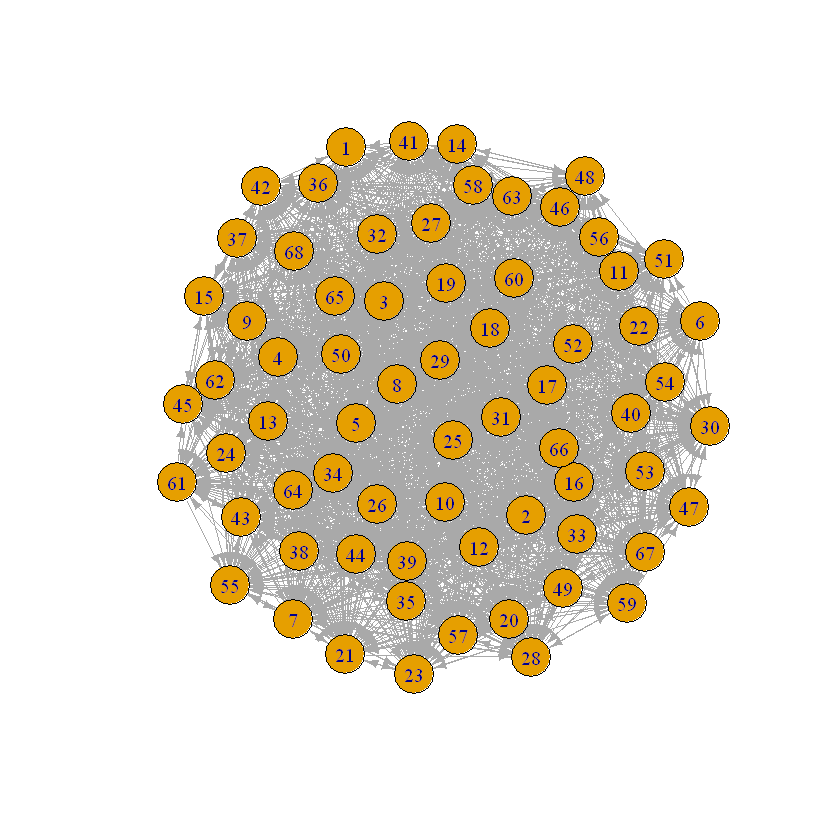

In [18]:
plot(graph, 
     vertex.size = 15, 
     edge.arrow.size=.5)

### Задание 3
Вычислить «пятичисловую сводку» для графа $\mathscr G_𝑑$.

In [24]:
net <- network(as_adjacency_matrix(graph), directed = T)

cat("Размер сети: ", network.size(net), "\n")

cat("Плотность сети: ", gden(net), "\n")

cat("Число компонент: ", components(net), "\n")

cat("Диаметр сети: ", diameter(graph), "\n")

cat("Коэффициент кластеризации: ", gtrans(net, mode = "graph"), "\n")

<sparse>[ <logic> ] : .M.sub.i.logical() maybe inefficient



Размер сети:  68 
Плотность сети:  0.5735294 
Число компонент:  1 
Диаметр сети:  2 
Коэффициент кластеризации:  0.573159 


### Задание 4
Вычислить цензус диад. Сделать выводы.

In [27]:
dyad_census(graph)

$mut
[1] 761

$asym
[1] 1091

$null
[1] 426

**Вывод:** 
- Количество пар с взаимными соединениями 𝑀  равно 761.

- Количество однонаправленных соединений 𝐴  равно 1091.

- Количество пар, между которыми нет соединений  𝑁  равно 426.

Отсюда следует что больше всего пар с однонаправлеными соединениями, а меньше всего пар между которыми связей нет.

### Задание 5
Вычислить оценку индекса взаимности Каца—Пауэла при фиксированом выборе акторов 𝑑 и при свободном выборе. Сделать выводы.


In [34]:
d <- 30 
m <- dyad_census(graph)$mut
rho <- (2*(g-1)*m - g * d^2)/(g*d*(g - 1 - d))
cat("При фиксированном d = 30:",rho, "\n")

adj_matrix <- as.matrix(as_adjacency_matrix(graph))
L <- sum(rowSums(adj_matrix))
L2 <- sum(rowSums(adj_matrix)^2)
rho2 <- (2*(g - 1)^2 * m - L^2 + L2)/(L*(g - 1)^2 - L^2 + L2)
cat("При свободном выборе:",rho2)

При фиксированном d = 30: 0.5401961 
При свободном выборе: 0.02123369

**Вывод:** 
- для фиксированого выбора акторов (d = 30),  акторы  склонны образовывать взаимные связи.
- для свободного выбора ,  акторы не имеют склонности взаимно выбирать друг друга.

### Задание 6
Вычислить вероятность того, что связь будет взаимной для каждого случая.

In [36]:
p_fix <- (d / (g-1)) * ((d/(g-1)) + rho*(g - 1 - d) / (g - 1))
cat("Вероятность взаимной связм для фиксированного выбора:",p_fix, "\n")

p_free <- (rowSums(adj_matrix) * colSums(adj_matrix))/(g - 1)^2
p_free_avg <- sum(p_free)/g
cat("Вероятность взаимной связм для свободного выбора:",p_free_avg)

Вероятность взаимной связм для фиксированного выбора: 0.334065 
Вероятность взаимной связм для свободного выбора: 0.3284467

### Задание 7
Вычислить индекс взаимности Бандиопадхьяйя. Сделать выводы.


In [41]:
g_func <- function(row_sum, g, t) {
    xi_sum <- sum(row_sum[1:t])
    min_sum <- 0   
    for (i in (t+1):g) {
        min_sum <- min_sum + min(c(t, row_sum[i]))
    }
    res <- xi_sum - t*(t-1) - min_sum
    return(res)
}

f_func <- function(row_sum, g, t) {
    xi_sum <- sum(row_sum[1:t])
    combination <- factorial(t)/(factorial(2) * factorial(t-2))
    res <- xi_sum - t*(g-1) - combination 
    return(res)
}

row_sum <- rowSums(adj_matrix)

g_res <- rep(2, g - 1)
for (t in 2:(g-1)) {
    g_res[t] <- g_func(row_sum, g, t)
}

f_res <- rep(2, g)
for (t in 2:g) {
    f_res[t] <- f_func(row_sum, g, t)
}

m_max <- floor(0.5 * sum(row_sum[1:g]) - max(g_res))
m_min <- max(f_res)

Ban_index <- (m - m_min)/(m_max - m_min)
cat("Индекс взаимности Бандиопадхьяйя:",Ban_index)

Индекс взаимности Бандиопадхьяйя: 0.5829493

**Вывод**: Можем заметить что индекс взаимности Бандиопадхьяйя примерно равен значению $p$

### Задание 8
Проверить нулевую гипотезу о том, что число дуг $𝐿$ в орграфе $\mathscr G_𝑑$ имеет биномиальное распределение $𝐿 ∼ Bin(𝑔(𝑔 − 1), 1/2)$ при уровне значимости $𝛼$. Определить максимальный уровень значимости при котором нулевая гипотеза не отвергается.


In [51]:
l <- sum(adj_matrix)
b_test <- binom.test(l, g*(g-1), p = 0.5)

cat("Привдива ли нулевая гипотеза:",b_test$p.value >= 0.05, "\n")
cat("Максимальный уровень значимости при котором нулевая гипотеза не отвергается:", b_test$p.value)

Привдива ли нулевая гипотеза: FALSE 
Максимальный уровень значимости при котором нулевая гипотеза не отвергается: 3.10898e-23

### Задание 9
Проверить нулевую гипотезу о том, что число дуг $𝐿$ в орграфе $\mathscr G_𝑑$
имеет биномиальное распределение $𝐿 ∼ Bin(𝑔(𝑔−1), 𝑃_0)$ при уровне
значимости $𝛼$. Определить максимальный уровень значимости при
котором нулевая гипотеза не отвергается.

In [68]:
l <- sum(adj_matrix)
b_test <- binom.test(l, g*(g-1), p = P_0)

cat("Привдива ли нулевая гипотеза:",b_test$p.value >= 0.05, "\n")
cat("Максимальный уровень значимости при котором нулевая гипотеза не отвергается:", b_test$p.value)

Привдива ли нулевая гипотеза: FALSE 
Максимальный уровень значимости при котором нулевая гипотеза не отвергается: 5.765674e-06

### Задание 10
Построить доверительный интервал для оценки параметра $𝑝$ с доверительной надёжностью $1 − 𝛼$. Сделать выводы

In [67]:
l <- sum(adj_matrix)
ans <- BinomCI(l,  g*(g-1), conf.level = 1-alpha)

cat("Значение оценки параметра p:",ans[1],"\n")
cat("Доверительный интервал: [",ans[2],"; ",ans[3],"]\n")

Значение оценки параметра p: 0.5735294 
Доверительный интервал: [ 0.5584202 ;  0.5885026 ]


**Вывод:** Учитывая тот факт, что мы знаем истинное значение  $𝑝 = 0.58$ , можно утверждать, что доверительный интервал вычислен верно.

## Выводы

В ходе выполнения данной практической работы был проведен статистический анализ случайно смоделированного ориентированного графа с использованием средств и библиотек языка R. А именно был визуализирован сгенерированный граф , была посчитана его пятичисловая сводка, вычислены  цензус диад, оценка индекса взаимности Каца—Пауэла, индекс взаимности Бандиопадхьяйя, проверены гипотезы о биномиальном распределении числе дуг и построен доверительный интервал. Где необхожимо , был сделан содержательный вывод.
